# Analysing COD/CIS Images

## Values in the "unknown" part(s) of the header

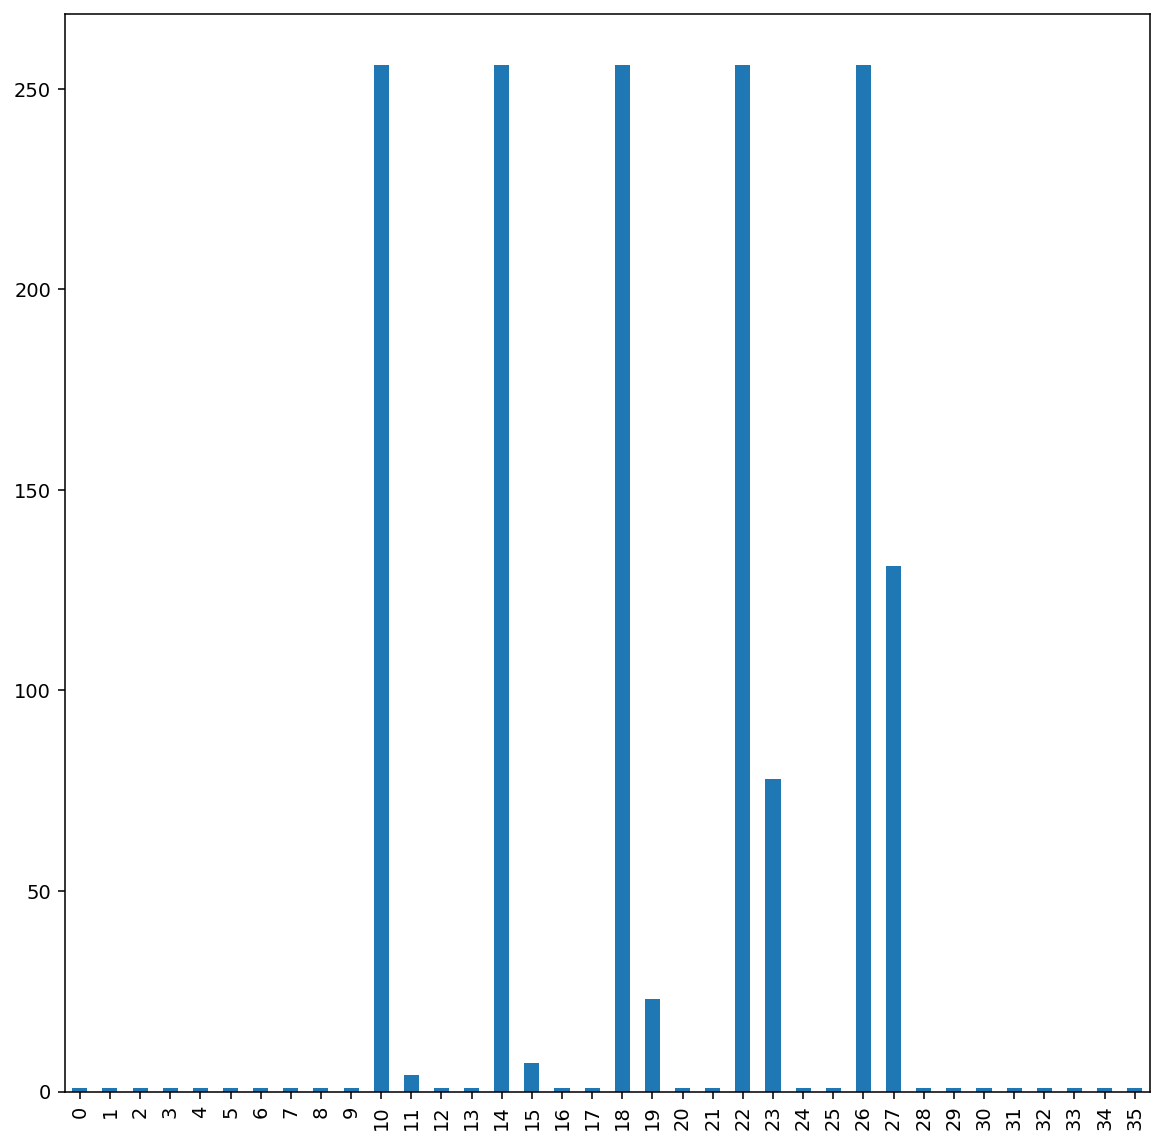

In [57]:
from dsat import Dsat
import pandas as pd
import matplotlib.pyplot as plt

d = Dsat.from_file("../dsatnord.mp")

data = []
for t in d.tiles_zoom3.tiles:
    data.append([int(h) for h in t.header.unknown5])

df = pd.DataFrame(data)
df.nunique().plot.bar()
plt.show()

In [ ]:
from dsat import Dsat
import pandas as pd
d = Dsat.from_file("../dsatnord.mp")

df = pd.DataFrame([[int(h) for h in t.header.unknown5] for t in d.tiles_zoom1.tiles])

In [111]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,24,1,0,0,1,1,1,1,1,5,...,33,0,0,0,0,0,2,0,2,0
1,24,1,0,0,1,1,1,1,1,5,...,33,0,0,0,0,0,2,0,2,0
2,24,1,0,0,1,1,1,1,1,5,...,33,0,0,0,0,0,2,0,2,0
3,24,1,0,0,1,1,1,1,1,5,...,33,0,0,0,0,0,2,0,2,0
4,24,1,0,0,1,1,1,1,1,5,...,126,2,0,0,0,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,24,1,0,0,1,1,1,1,1,5,...,105,43,0,0,0,0,1,0,2,0
165,24,1,0,0,1,1,1,1,1,5,...,134,78,0,0,0,0,1,0,2,0
166,24,1,0,0,1,1,1,1,1,5,...,39,6,0,0,0,0,2,0,2,0
167,24,1,0,0,1,1,1,1,1,5,...,59,3,0,0,0,0,2,0,2,0


## Stats about "cod" parts

### Number of parts per tile

In [22]:
import pandas as pd
from cis import Cis

def le16(b):
    return int.from_bytes(b, byteorder="little", signed=False)

def get_planes(b):
    """Statistics about "cod" parts in byte array b."""
    planes = []
    lastpos = 0
    for i in range(0, len(b) - 2):
        if chr(b[i]) == 'c' and chr(b[i+1]) == 'o' and chr(b[i+2]) == 'd':
            planes.append(b[lastpos:i])
            lastpos = i + 3
    return planes

img = "../img/wolf.cod"
img = "../img/tile_644684211.cod"

c = Cis.from_file(img)

planes = get_planes(c.data.planes)

[(le16(b[0:2]), le16(b[2:4]), le16(b[4:6]), len(b)) for b in planes]

[(1338, 61620, 30, 651),
 (1001, 63941, 16, 507),
 (1177, 63825, 16, 500),
 (1012, 64637, 12, 447),
 (708, 64679, 12, 1578),
 (806, 64524, 12, 1554),
 (536, 64979, 10, 1498),
 (513, 64926, 10, 4112),
 (522, 64769, 10, 3879),
 (442, 65223, 8, 2502),
 (301, 65075, 8, 3249),
 (245, 65260, 8, 3057),
 (200, 65356, 4, 561)]

In [42]:
from dsat import Dsat
import pandas as pd

d = Dsat.from_file("../dsatnord.mp")

def count_cod(b):
    """Statistics about "cod" parts in byte array b."""
    pos = []
    for i in range(0, len(b) - 2):
        if chr(b[i]) == 'c' and chr(b[i+1]) == 'o' and chr(b[i+2]) == 'd':
            pos.append(i)
    return len(pos)

print(0, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom0.tiles]).value_counts(), sep='\n')
print(1, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom1.tiles]).value_counts(), sep='\n')
print(2, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom2.tiles]).value_counts(), sep='\n')
print(3, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom3.tiles]).value_counts(), sep='\n')

0
39    17
42     2
48     1
dtype: int64
1
36    162
39      7
dtype: int64
2
36    2238
37       1
39       1
dtype: int64
3
13    24667
14       33
dtype: int64


### Looking at some header parts

There are still some parts in the header whose purpose is not clear, yet. Thus, we here look at the bytes in the part named `unknown5`:

In [15]:
from dsat import Dsat
from cis import Cis
import pandas as pd


def count_cod(b):
    """Statistics about "cod" parts in byte array b."""
    pos = []
    for i in range(0, len(b) - 2):
        if chr(b[i]) == 'c' and chr(b[i+1]) == 'o' and chr(b[i+2]) == 'd':
            pos.append(i)
    return len(pos)


def header_stats(img):
    return [
        img.header.width, 
        img.header.height, 
        count_cod(img.data.planes),
    ] + [int(i) for i in img.header.unknown5]


def stats(name, tiles):
    return [[name] + header_stats(img) for img in tiles]


d = Dsat.from_file("../dsatnord.mp")
fox = Cis.from_file("../img/fox.cod")
wolf = Cis.from_file("../img/wolf.cod")

df = pd.DataFrame(
    [
        ["fox"] + header_stats(fox), 
        ["wolf"] + header_stats(wolf)
    ] + 
    stats("zoom0", d.tiles_zoom0.tiles) + 
    stats("zoom1", d.tiles_zoom1.tiles) + 
    stats("zoom2", d.tiles_zoom2.tiles) + 
    stats("zoom3", d.tiles_zoom3.tiles),
    columns = [
        "name", "width", "height", "bands"
    ] + ["h" + str(i) for i in range(43 - 3)]
)

df

,name,width,height,bands,h0,h1,h2,h3,h4,h5,...,h30,h31,h32,h33,h34,h35,h36,h37,h38,h39
0,fox,640,480,30,24,1,0,0,1,1,...,128,0,0,0,0,0,2.0,1.0,2.0,1.0
1,wolf,768,512,33,24,1,0,0,1,1,...,49,0,0,0,0,0,1.0,1.0,2.0,1.0
2,zoom0,250,250,48,24,1,0,0,1,1,...,88,22,0,0,0,0,0.0,0.0,0.0,0.0
3,zoom0,250,250,39,24,1,0,0,1,1,...,180,32,0,0,0,0,1.0,0.0,2.0,0.0
4,zoom0,250,250,39,24,1,0,0,1,1,...,106,54,0,0,0,0,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27126,zoom3,1000,1000,13,8,0,0,0,1,1,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
27127,zoom3,1000,1000,13,8,0,0,0,1,1,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
27128,zoom3,1000,1000,13,8,0,0,0,1,1,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
27129,zoom3,1000,1000,13,8,0,0,0,1,1,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN


Only few bytes of `unknown5` change from image to image: mainly `h10` to `h33` which might represent six 32 bit numbers, given their value distribution in the first plot of this notebook. Thus, we focus on the parts which are the same for most images and try to understand their meaning: 

In [10]:
dfa = df.drop(columns = [
    "h10", "h11", "h12", "h13",
    "h14", "h15", "h16", "h17",
    "h18", "h19", "h20", "h21",
    "h22", "h23", "h24", "h25",
    "h26", "h27", "h28", "h29",
    "h30", "h31", "h32", "h33"
]).drop_duplicates().sort_values("bands")
dfa

,name,width,height,bands,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h34,h35,h36,h37,h38,h39
2431,zoom3,1000,1000,13,8,0,0,0,1,1,1,1,1,5,1,0,NaN,NaN,NaN,NaN
4410,zoom3,1000,1000,14,8,0,0,0,1,1,1,1,1,5,1,0,NaN,NaN,NaN,NaN
0,fox,640,480,30,24,1,0,0,1,1,1,1,1,5,0,0,2.0,1.0,2.0,1.0
1,wolf,768,512,33,24,1,0,0,1,1,1,1,1,5,0,0,1.0,1.0,2.0,1.0
22,zoom1,500,500,36,24,1,0,0,1,1,1,1,1,5,0,0,2.0,0.0,2.0,0.0
191,zoom2,500,500,36,24,1,0,0,1,1,1,1,1,5,0,0,2.0,0.0,2.0,0.0
1003,zoom2,500,500,37,24,1,0,0,1,1,1,1,1,5,0,0,2.0,0.0,2.0,0.0
3,zoom0,250,250,39,24,1,0,0,1,1,1,1,1,5,0,0,1.0,0.0,2.0,0.0
131,zoom1,500,500,39,24,1,0,0,1,1,1,1,1,5,0,0,1.0,0.0,2.0,0.0
504,zoom2,500,500,39,24,1,0,0,1,1,1,1,1,5,0,0,1.0,0.0,2.0,0.0


Given that the zoom3 images are greyscale and all others colour, we could guess the following purposes:

| byte | purpose |
|------|:--------|
|  `h0`  | number of bits for each pixel (8 for greyscale, 24 for colour)? |
|  `h1`  | greyscale vs. colour? |
|  `h9`  | default depth of wavelet decomposition? |
| `h10`  | relative depth (to default) used for greyscale images, i.e., actual depth = `h9` - `h10`? |
| `h36` to `h39` | relative depths for the individual colour components (although we would expect only three values not four)? |

Given the depth *d*, the number of bands for one component (e.g., colour) is computed as *3d + 1*. So for the greyscale images, a depth of *5 - 1 = 4* would result in *3 * 4 + 1 = 13* bands which fits nicely to almost all of the greyscale images (24667 out of 24700).

Let's define a function that computes the number of bands for colour images from a default depth and relative depths for each of the three components of the [Y'UV colour model](https://en.wikipedia.org/wiki/Y%E2%80%B2UV): 

In [11]:
def calc_bands(default_depth, y, b, r):
    return (default_depth - y) * 3 + 1 + (default_depth - b) * 3 + 1 + (default_depth - r) * 3 + 1 

Let's take the values h36, h37, and h38 as relative depths for y, b, and r, respectively:

In [14]:
dfa["bands'"] = calc_bands(df["h9"], df["h36"], df["h37"], df["h38"])
dfa["b == b'?"] = dfa["bands"] == dfa["bands'"]
dfa

,name,width,height,bands,h0,h1,h2,h3,h4,h5,...,h8,h9,h34,h35,h36,h37,h38,h39,bands',b == b'?
2431,zoom3,1000,1000,13,8,0,0,0,1,1,...,1,5,1,0,NaN,NaN,NaN,NaN,NaN,False
4410,zoom3,1000,1000,14,8,0,0,0,1,1,...,1,5,1,0,NaN,NaN,NaN,NaN,NaN,False
0,fox,640,480,30,24,1,0,0,1,1,...,1,5,0,0,2.0,1.0,2.0,1.0,33.0,False
1,wolf,768,512,33,24,1,0,0,1,1,...,1,5,0,0,1.0,1.0,2.0,1.0,36.0,False
22,zoom1,500,500,36,24,1,0,0,1,1,...,1,5,0,0,2.0,0.0,2.0,0.0,36.0,True
191,zoom2,500,500,36,24,1,0,0,1,1,...,1,5,0,0,2.0,0.0,2.0,0.0,36.0,True
1003,zoom2,500,500,37,24,1,0,0,1,1,...,1,5,0,0,2.0,0.0,2.0,0.0,36.0,False
3,zoom0,250,250,39,24,1,0,0,1,1,...,1,5,0,0,1.0,0.0,2.0,0.0,39.0,True
131,zoom1,500,500,39,24,1,0,0,1,1,...,1,5,0,0,1.0,0.0,2.0,0.0,39.0,True
504,zoom2,500,500,39,24,1,0,0,1,1,...,1,5,0,0,1.0,0.0,2.0,0.0,39.0,True


The computed number of bands fits nicely for almost all colour tiles, except only one (!) zoom2 tile with 37 bands. The "fox" and "wolf" example images are the only ones that have a non-zero value for `h39` and the number of computed bands is too large by 3 for each of them. So maybe the 1 in `h39` tells us to reduce the number of bands by 3 – but why? 

### Number of distinct distances between parts

In [51]:
from dsat import Dsat
import pandas as pd

d = Dsat.from_file("../dsatnord.mp")

def count_cod(b):
    """Statistics about "cod" parts in byte array b."""
    dists = set()
    lastpos = 0
    for i in range(0, len(b) - 2):
        if chr(b[i]) == 'c' and chr(b[i+1]) == 'o' and chr(b[i+2]) == 'd':
            dists.add(i - lastpos)
    return len(dists)

print(0, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom0.tiles]).value_counts(), sep='\n')
print(1, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom1.tiles]).value_counts(), sep='\n')
print(2, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom2.tiles]).value_counts(), sep='\n')
print(3, pd.DataFrame([count_cod(t.data.unknown) for t in d.tiles_zoom3.tiles]).value_counts(), sep='\n')

0
39    17
42     2
48     1
dtype: int64
1
36    162
39      7
dtype: int64
2
36    2238
37       1
39       1
dtype: int64
3
13    24667
14       33
dtype: int64


### Size Distribution of Sub-Bands

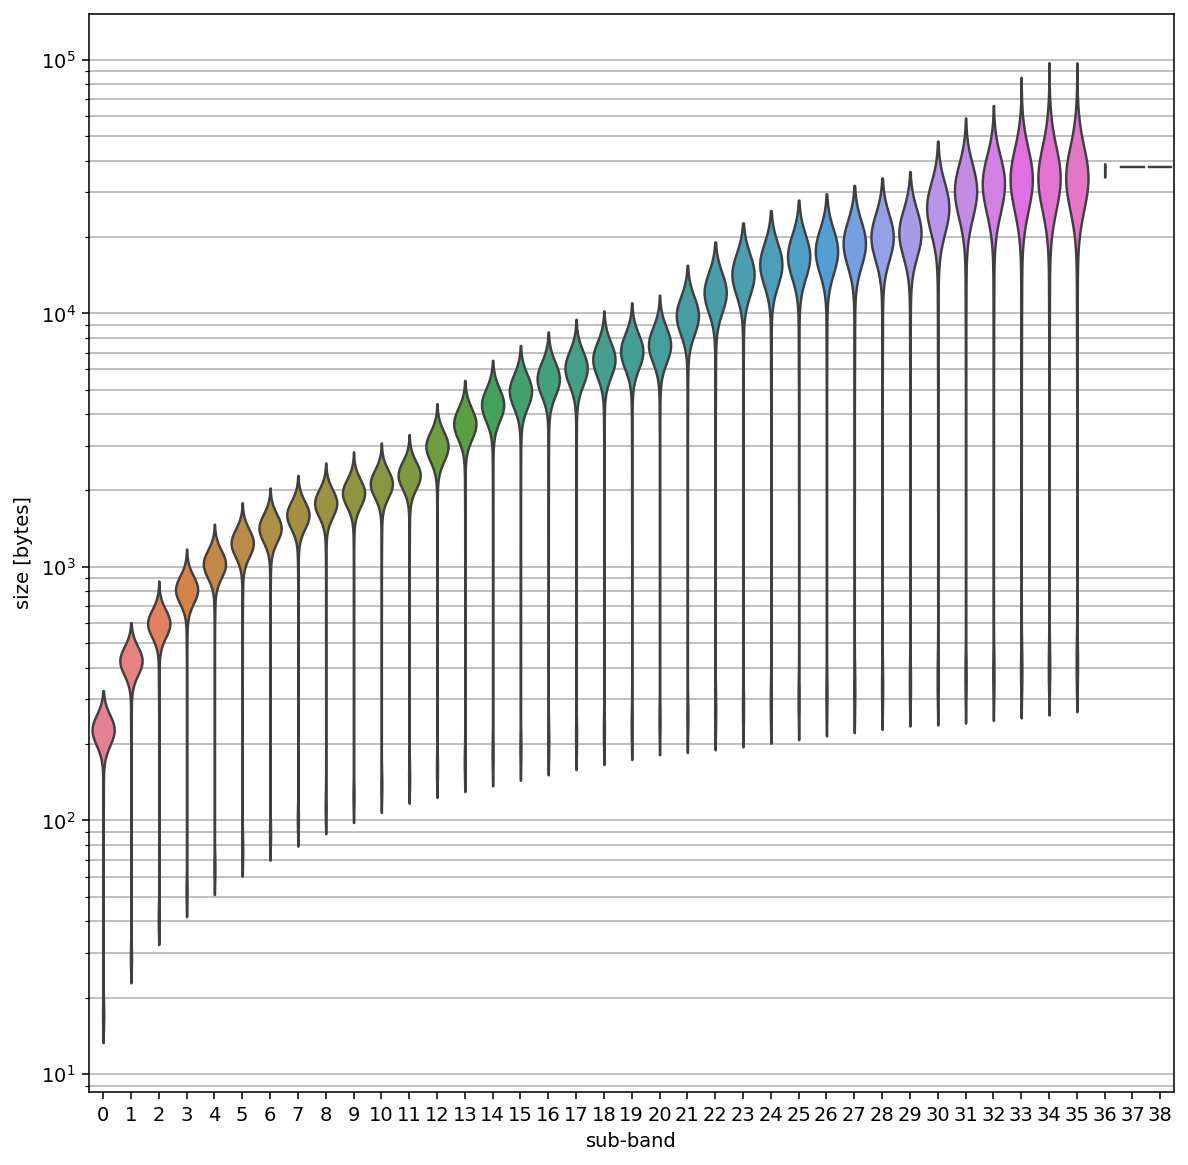

In [55]:
from dsat import Dsat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 140

def cod_sizes(b):
    """Sizes of "cod"-delimited parts in byte array b."""
    sizes = []
    lastpos = 0
    for i in range(0, len(b) - 2):
        if chr(b[i]) == 'c' and chr(b[i+1]) == 'o' and chr(b[i+2]) == 'd':
            sizes.append(i - lastpos)
    return sizes

df = pd.DataFrame([cod_sizes(t.data.planes) for t in Dsat.from_file("../dsatnord.mp").tiles_zoom3.tiles])

ax = sns.violinplot(df, inner=None, split=False, log_scale=True, zorder=3, density_norm="count", common_norm=True)
plt.ylabel("size [bytes]")
plt.xlabel("sub-band")
plt.grid(axis="y", which="both", zorder=0)
for i in df.columns:
    ax.text(i + 0.1, df[[i]].min().iloc[0], "{:2.0f}".format(df[[i]].mean().iloc[0]))

plt.show()